#**Install Library**

In [1]:
!pip install esda
!pip install libpysal
!pip install contextily
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 35.1 MB/s eta 0:00:00


#**Import Library**

In [2]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import shapely.geometry as geom
import requests
import contextily as ctx
import mapclassify
import matplotlib.pyplot as plt



%matplotlib inline

#**Read Dataset**

In [3]:
# Unduh file GeoJSON
url = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/SpatialAnalysis/berlin/berlin-neighbourhoods.geojson'
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/SpatialAnalysis/berlin/berlin-listings.csv"

response = requests.get(url)

# Simpan file GeoJSON secara lokal
with open('berlin-neighbourhoods.geojson', 'wb') as file:
    file.write(response.content)

# Baca file GeoJSON dari lokasi lokal
gdf = gpd.read_file('berlin-neighbourhoods.geojson')

listings = pd.read_csv(dataset1)

In [4]:
listings['geometry'] = listings[['longitude','latitude']].apply(geom.Point,axis=1) #take each row

/usr/local/lib/python3.10/dist-packages/contextily/tile.py:614: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


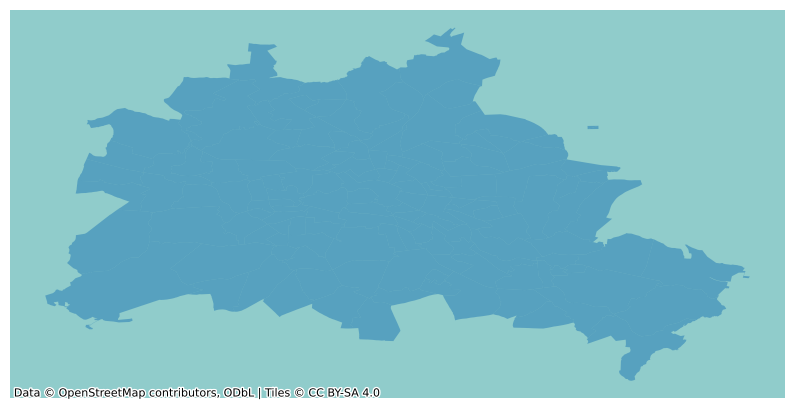

In [5]:

# Unduh file GeoJSON
url = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/SpatialAnalysis/berlin/berlin-neighbourhoods.geojson'
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/SpatialAnalysis/berlin/berlin-listings.csv"

response = requests.get(url)

# Simpan file GeoJSON secara lokal
with open('berlin-neighbourhoods.geojson', 'wb') as file:
    file.write(response.content)

# Baca file GeoJSON dari lokasi lokal
gdf = gpd.read_file('berlin-neighbourhoods.geojson')

# Baca file CSV ke DataFrame
listings = pd.read_csv(dataset1)

# Dapatkan batas wilayah dari kolom geometri di 'gdf'
bounds = gdf.geometry.total_bounds

# Pastikan bahwa 'bounds' adalah array satu dimensi
if len(bounds) == 4:
    # Mendapatkan gambar dari peta dengan batas wilayah menggunakan contextily
    img, ext = ctx.bounds2img(*bounds, zoom=10)

    # Menambahkan latar belakang dari peta menggunakan contextily ke GeoDataFrame
    ax = gdf.plot(figsize=(10, 10), alpha=0.5)
    ctx.plotting.add_basemap(ax, url=img, attribution="Data © OpenStreetMap contributors, ODbL | Tiles © CC BY-SA 4.0")
    ax.set_axis_off()  # Matikan sumbu x dan y
    plt.show()  # Tampilkan plot

else:
    print("Format bounds tidak sesuai, cek nilai yang dikembalikan oleh 'total_bounds'.")


#**Plotting Map**

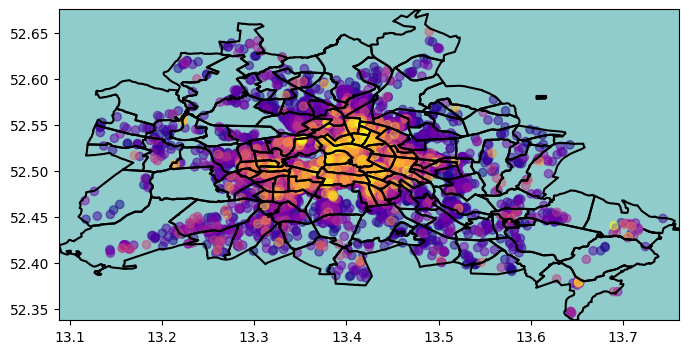

In [6]:
# Unduh file GeoJSON
url = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/SpatialAnalysis/berlin/berlin-neighbourhoods.geojson'
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/SpatialAnalysis/berlin/berlin-listings.csv"

response = requests.get(url)

# Simpan file GeoJSON secara lokal
with open('berlin-neighbourhoods.geojson', 'wb') as file:
    file.write(response.content)

# Baca file GeoJSON dari lokasi lokal
gdf = gpd.read_file('berlin-neighbourhoods.geojson')

# Baca file CSV ke DataFrame
listings = pd.read_csv(dataset1)

# Dapatkan batas wilayah dari kolom geometri di 'gdf'
bounds = gdf.geometry.total_bounds

# Pastikan bahwa 'bounds' adalah array satu dimensi
if len(bounds) == 4:
    # Mendapatkan gambar dari peta dengan batas wilayah menggunakan contextily
    img, ext = ctx.bounds2img(*bounds, zoom=10)

    # Membuat plot baru
    f = plt.figure(figsize=(8, 8))
    ax = plt.gca()

    # Plot batas wilayah (tanpa gambar polygon)
    gdf.boundary.plot(color='k', ax=ax)

    # Tampilkan latar belakang peta
    ax.imshow(img, extent=ext, interpolation='gaussian')

    # Atur batas wilayah plot
    ax.axis(gdf.total_bounds[np.asarray([0, 2, 1, 3])])

    # Urutkan data listings berdasarkan 'price' dan plot dengan colormap 'plasma'
    listings_sorted = listings.sort_values('price')
    ax.scatter(listings_sorted['longitude'], listings_sorted['latitude'], c=listings_sorted['price'],
               cmap='plasma', marker='o', alpha=0.5)

    plt.show()  # Tampilkan plot

else:
    print("Format bounds tidak sesuai, cek nilai yang dikembalikan oleh 'total_bounds'.")


In [7]:
bl_df = pd.read_csv(dataset1)
geometry = [Point(xy) for xy in zip(bl_df.longitude, bl_df.latitude)]
crs = {'init': 'epsg:4326'}
bl_gdf = GeoDataFrame(bl_df, crs=crs, geometry=geometry)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [8]:
bl_gdf['price'] = bl_gdf['price'].astype('float32')
sj_gdf = gpd.sjoin(gdf, bl_gdf, how='inner', op='intersects', lsuffix='left', rsuffix='right')
median_price_gb = sj_gdf['price'].groupby([sj_gdf['neighbourhood_group']]).mean()
median_price_gb

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-8-76209593199b>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  sj_gdf = gpd.sjoin(gdf, bl_gdf, how='inner', op='intersects', lsuffix='left', rsuffix='right')


neighbourhood_group
Charlottenburg-Wilm.        58.556408
Friedrichshain-Kreuzberg    55.492809
Lichtenberg                 44.584270
Marzahn - Hellersdorf       54.246754
Mitte                       60.387890
Neukölln                    45.135948
Pankow                      60.282516
Reinickendorf               43.682465
Spandau                     48.236561
Steglitz - Zehlendorf       54.445683
Tempelhof - Schöneberg      53.704407
Treptow - Köpenick          51.222004
Name: price, dtype: float32

In [9]:
gdf = gdf.join(median_price_gb, on='neighbourhood_group')
gdf.rename(columns={'price': 'median_pri'}, inplace=True)
gdf.head(15)

,neighbourhood,neighbourhood_group,geometry,median_pri
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",60.282516
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",60.282516
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",58.556408
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",51.222004
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",51.222004
5,Biesdorf,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.56643 52.53510, 13.56697 52...",54.246754
6,Nord 1,Reinickendorf,"MULTIPOLYGON (((13.33669 52.62265, 13.33663 52...",43.682465
7,West 5,Reinickendorf,"MULTIPOLYGON (((13.28138 52.59958, 13.28158 52...",43.682465
8,Frankfurter Allee Nord,Friedrichshain-Kreuzberg,"MULTIPOLYGON (((13.45320 52.51682, 13.45321 52...",55.492809
9,Buch,Pankow,"MULTIPOLYGON (((13.46449 52.65055, 13.46457 52...",60.282516


<Axes: >

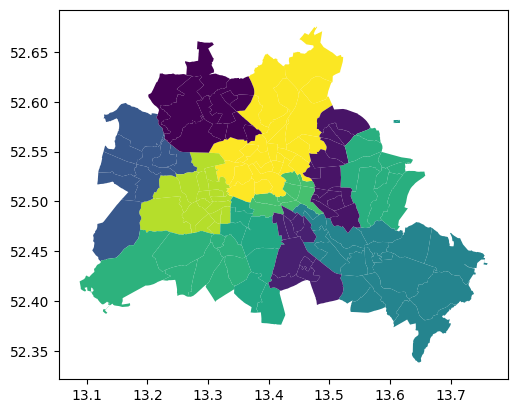

In [10]:
pd.isnull(gdf['median_pri']).sum()
gdf['median_pri'].fillna((gdf['median_pri'].mean()), inplace=True)
gdf.plot(column='median_pri')

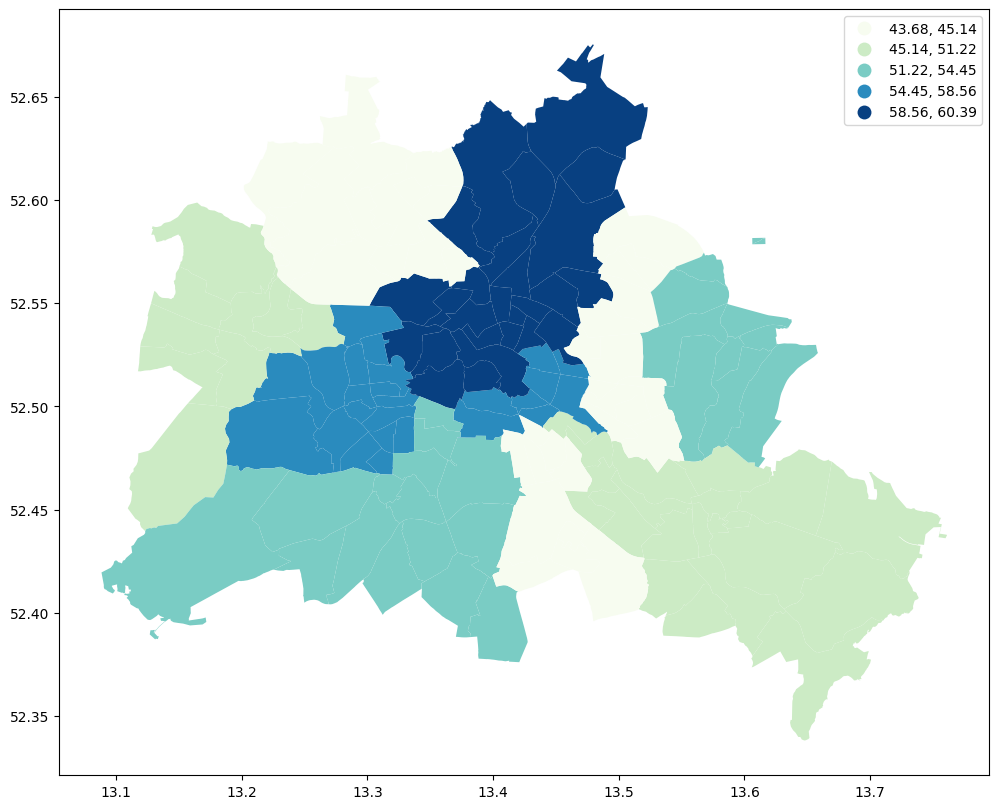

In [11]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'aspect': 'equal'})
gdf.plot(column='median_pri', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax)
plt.show()

#**Spatial Autocorrelation**

Inspeksi visual pola peta harga memungkinkan kita mencari struktur spasial. Jika distribusi harga secara spasial bersifat acak, maka kita tidak akan melihat adanya pengelompokan harga yang serupa di peta. Namun, sistem visual kita tertarik pada kelompok yang lebih gelap di bagian barat daya dan tengah, dan konsentrasi warna yang lebih terang (harga lebih rendah) di bagian utara tengah dan tenggara.

##**Spatial Similarity**

In [12]:
df = gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

<ipython-input-12-a2341e16343b>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq =  lps.weights.Queen.from_dataframe(df)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


##**Attribute Similarity**

So the spatial weight between neighborhoods and indicates if the two are neighbors (i.e., geographically similar). What we also need is a measure of attribute similarity to pair up with this concept of spatial similarity. The spatial lag is a derived variable that accomplishes this for us. For neighborhood the spatial lag is defined as: <br>
ylagi = sigma(wiyi)

In [13]:
y = df['median_pri']
ylag = lps.weights.lag_spatial(wq, y)
ylag

array([56.9625061 , 60.28251648, 56.37749926, 51.22200394, 51.22200394,
       50.52180099, 43.6824646 , 45.63422012, 52.65491422, 60.28251648,
       53.64180374, 52.73586273, 52.73586273, 56.47182541, 47.83247757,
       58.58870177, 60.33520317, 59.60296903, 60.38788986, 60.02159348,
       51.80624199, 57.94034958, 52.84482813, 53.40314266, 57.90522512,
       60.28251648, 60.28251648, 55.79730334, 56.79401737, 50.81182589,
       59.01427841, 60.29756982, 60.28251648, 50.86356888, 60.3220315 ,
       60.28251648, 55.48057556, 54.42881557, 60.32466583, 59.50179418,
       54.42846909, 58.55640793, 58.55640793, 57.73426285, 57.47818544,
       57.74774106, 56.13040733, 48.23656082, 48.23656082, 53.74621709,
       55.11957245, 45.95951271, 51.67650986, 54.1985906 , 51.45368042,
       52.36880302, 54.44568253, 54.44568253, 50.84825389, 56.50104523,
       53.92108345, 55.9956289 , 50.49590378, 49.14499828, 48.61369433,
       49.70049   , 49.32550866, 51.22200394, 51.22200394, 47.80

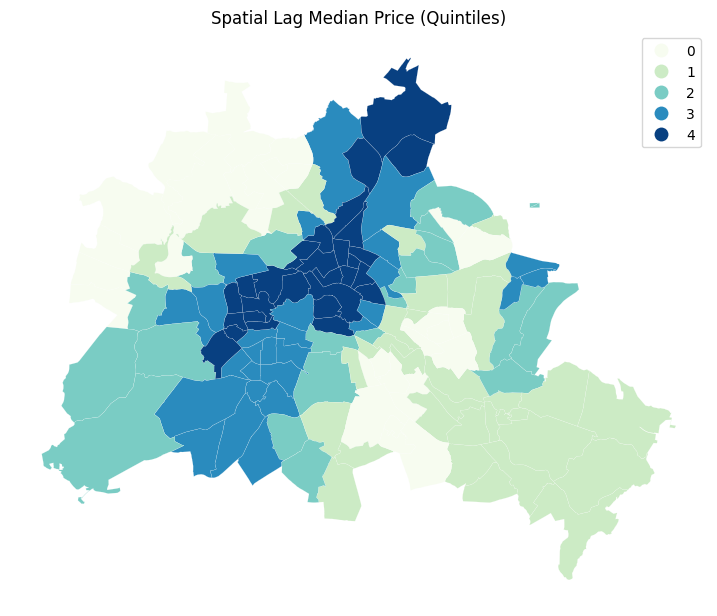

In [14]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median Price (Quintiles)")

plt.show()

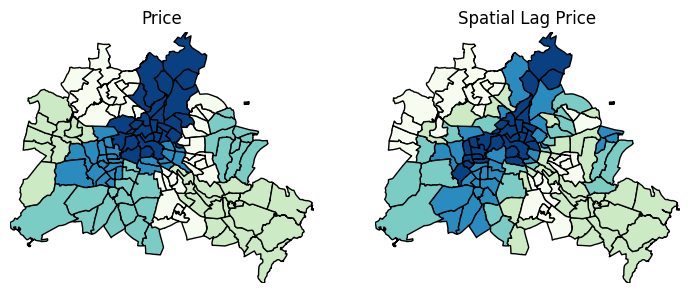

In [15]:
df['lag_median_pri'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='median_pri', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price")
df.plot(column='lag_median_pri', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

#**Global Spatial Autocorrelation**

<Axes: >

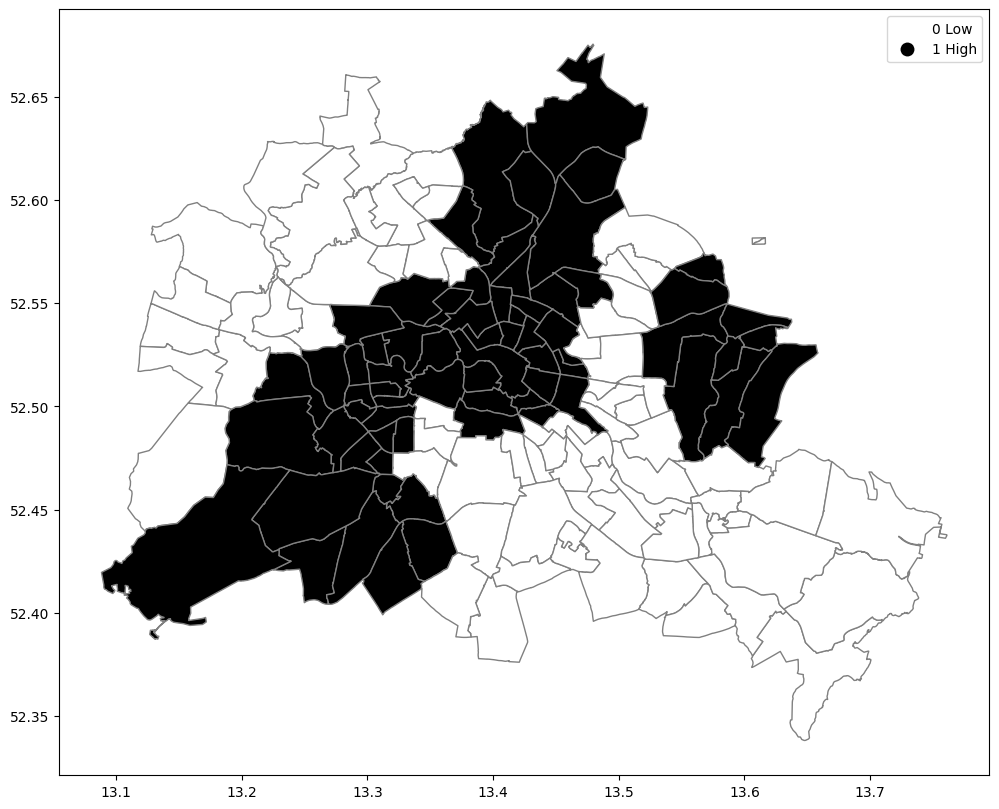

In [16]:
y.median()
yb = y > y.median()
sum(yb)

yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
df['yb'] = yb

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

#**Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers**

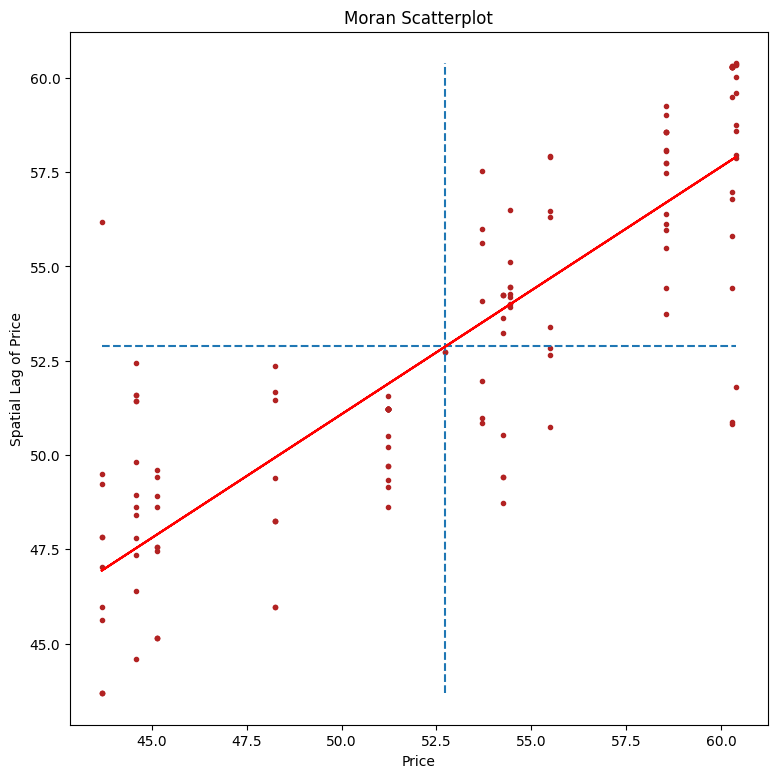

In [17]:
np.random.seed(12345)
import esda
wq.transform = 'r'
lag_price = lps.weights.lag_spatial(wq, df['median_pri'])

price = df['median_pri']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Price')
plt.xlabel('Price')
plt.show()

##**Hot Spot**

In [18]:
import numpy as np
import libpysal.weights as lp
from esda.moran import Moran_Local

# Contoh data (y) dan weight matrix (wq)
np.random.seed(123)
y = np.random.rand(100)
wq = lp.lat2W(10, 10)

# Gunakan Moran_Local
moran_loc = Moran_Local(y, wq)


In [19]:
# Dapatkan atribut 'q' setelah menghitung Moran's Local
q = moran_loc.q
q

array([4, 2, 3, 4, 4, 2, 4, 1, 2, 2, 2, 4, 3, 3, 2, 4, 2, 3, 4, 1, 4, 1,
       1, 4, 4, 2, 3, 3, 2, 4, 2, 3, 3, 3, 2, 3, 2, 1, 1, 1, 4, 2, 3, 2,
       4, 3, 2, 1, 1, 1, 2, 4, 1, 1, 2, 3, 2, 1, 4, 1, 4, 1, 1, 1, 4, 2,
       4, 3, 3, 4, 2, 4, 1, 4, 2, 4, 4, 3, 3, 4, 3, 1, 1, 2, 4, 1, 3, 3,
       3, 3, 1, 1, 2, 4, 1, 1, 3, 3, 3, 3])

In [20]:
import numpy as np
import libpysal.weights as lp
from esda.moran import Moran_Local

# Contoh data (y) dan weight matrix (wq)
np.random.seed(123)
y = np.random.rand(100)
wq = lp.lat2W(10, 10)

# Hitung Moran's Local
moran_loc = Moran_Local(y, wq)

# Gunakan hasil Moran's Local untuk menghitung jumlah nilai p_sim kurang dari 0.05
jumlah_p_sim_kurang_dari_005 = (moran_loc.p_sim < 0.05).sum()
print(jumlah_p_sim_kurang_dari_005)

15


In [21]:
import geopandas as gpd
from esda.moran import Moran_Local
import libpysal.weights as lp
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt

# Contoh data
np.random.seed(123)
y = np.random.rand(100)
wq = lp.lat2W(10, 10)

# Hitung Moran's Local
moran_loc = Moran_Local(y, wq)

# Menyiapkan data GeoDataFrame (df) untuk plotting
# Ganti ini dengan data yang kamu miliki
# Contoh:
# df = gpd.read_file('nama_file.shp')

# Memeriksa jumlah baris dari kedua dataset
print("Jumlah baris pada df:", df.shape[0])
print("Jumlah baris pada moran_loc:", moran_loc.n)

# Menyesuaikan jumlah baris jika tidak sama
# Lakukan penyesuaian pada dataset yang diperlukan agar jumlah barisnya sama

# Melakukan plotting setelah jumlah baris sama
# Lanjutkan ke bagian plotting setelah jumlah baris pada kedua dataset sudah sama


Jumlah baris pada df: 140
Jumlah baris pada moran_loc: 100


In [28]:
# Misalkan Anda sudah memiliki hasil Moran's Local dalam variabel li

sig = moran_loc.p_sim < 0.05
hotspot = (sig) & (moran_loc.q == 1)
coldspot = (sig) & (moran_loc.q == 3)
doughnut = (sig) & (moran_loc.q == 2)
diamond = (sig) & (moran_loc.q == 4)

In [29]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

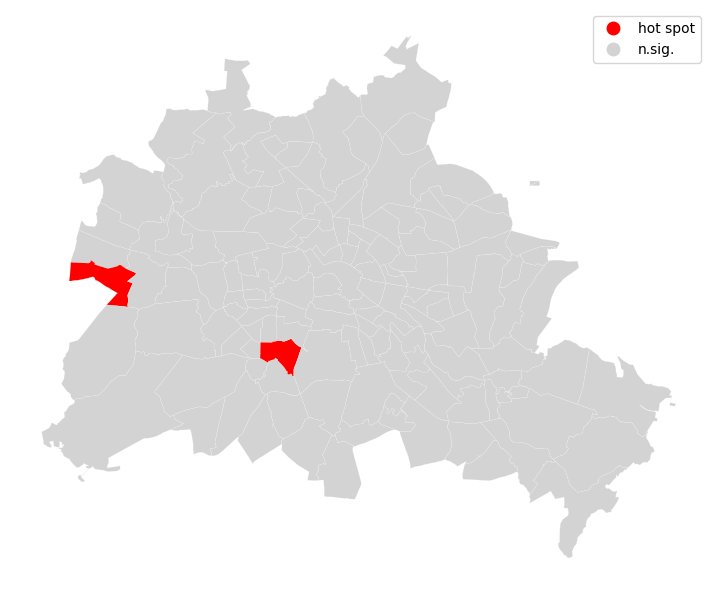

In [30]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

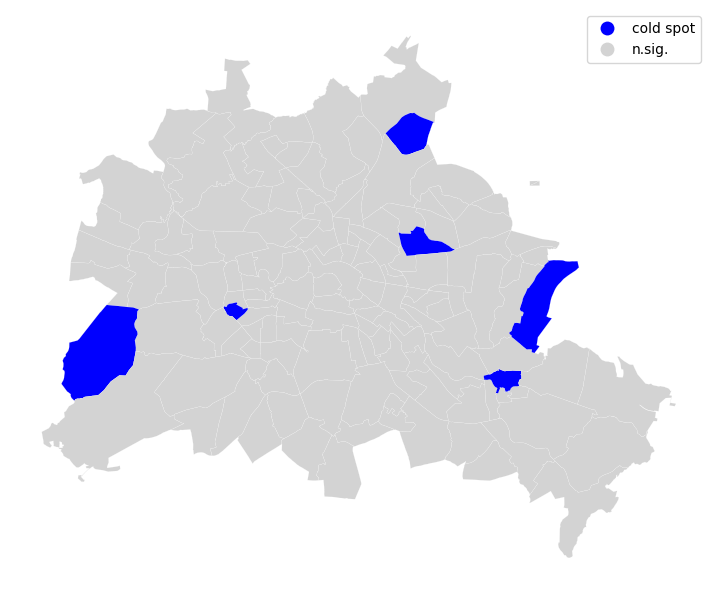

In [31]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [32]:
sig = 1 * (moran_loc.p_sim < 0.05)
hotspot = 1 * (sig * moran_loc.q==1)
coldspot = 3 * (sig * moran_loc.q==3)
doughnut = 2 * (sig * moran_loc.q==2)
diamond = 4 * (sig * moran_loc.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 1, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 3, 0, 0, 0])

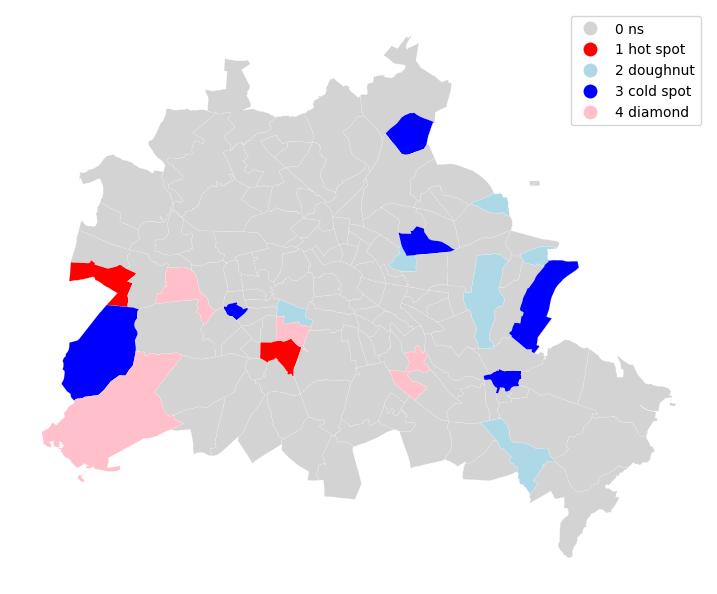

In [33]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()